# Microsoft Movie Studio Analysis

# Overview

This project analyzes movie data from IMDB and Box Office Mojo to help guide Microsoft's new movie studio business as it evaluates the best way to compete with others such as Netflix, Amazon, Disney, etc. Descriptive analysis of movie data shows that certain movie genres do much better at the box office than others. Microsoft is looking for recommendations for what typ of films do the best at the box office. Microsoft can use this analysis to focus their studio on certain film genres.

# Business Problem


Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired me to help them better understand the movie industry. I am charged with exploring what type of films are currently doing the best at the box office and translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

To do this I will answer the following questions. 

What movie genre in the last five years in the US market has the highest user ratings? 
What movie genre in the last five years in the US market has the highest number of reviews? 
What movie genre in the last five years in the US market has the highest gross box office revenue?
Do ratings and revenue correlate?

# Data Understanding

IMDB and Box Office Mojo combined have a tremendous amound of data specific to movies. Data includes information on movie ratings, votes, domestic and international box office revenue, production companies, languages, etc. For this analysis I will use data from imdb.title.basics, imdb.title.akas, imdb.title.ratings and bom.movie_gross. 

Import the tools needed for the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame

Import the .csv files into Jupyter and create data frames

In [2]:
genre_df = pd.read_csv('../../data/imdb.title.basics.csv.gz')

In [3]:
title_basics_df = pd.read_csv('../../data/imdb.title.akas.csv.gz')

In [4]:
title_ratings_df = pd.read_csv('../../data/imdb.title.ratings.csv.gz')

In [5]:
movie_gross_df = pd.read_csv('../../data/bom.movie_gross.csv.gz')

A quick overview of the columns and data contained in each file.

In [7]:
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [8]:
title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [9]:
title_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [10]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Let's look a little closer at the layout of columns and rows, and what's contained in each.

In [11]:
genre_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [12]:
title_basics_df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [13]:
title_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [14]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


# Data Preparation

I make the files easier to work with by removing unnecesary data not related to this project such as 'foreign_gross' and 'studio' from movie_gross_df.
I will focus on the last five years available to keep it relevent and reduce some of the data.

In [127]:
movie_gross_df.loc[movie_gross_df['year']>= 2014]

,title,studio,domestic_gross,foreign_gross,year
1477,Transformers: Age of Extinction,Par.,245400000.0,858600000,2014
1478,The Hobbit: The Battle of the Five Armies,WB (NL),255100000.0,700900000,2014
1479,Guardians of the Galaxy,BV,333200000.0,440200000,2014
1480,Maleficent,BV,241400000.0,517100000,2014
1481,The Hunger Games: Mockingjay - Part 1,LGF,337100000.0,418200000,2014
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


And further whittle it down to US based films.

In [18]:
title_basics_df.loc[title_basics_df['region']=='US']

,title_id,ordering,title,region,language,types,attributes,is_original_title
12,tt0369610,21,Jurassic World 3D,US,NaN,NaN,3-D version,0.0
20,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0
21,tt0369610,2,Ebb Tide,US,NaN,NaN,fake working title,0.0
28,tt0369610,36,Jurassic Park IV,US,NaN,working,NaN,0.0
37,tt0369610,44,Jurassic Park 4,US,NaN,NaN,informal alternative title,0.0
...,...,...,...,...,...,...,...,...
331645,tt9310460,6,Coconut the Little Dragon 2 Into the Jungle,US,NaN,imdbDisplay,NaN,0.0
331654,tt9358044,2,Hail Satan?,US,NaN,imdbDisplay,NaN,0.0
331673,tt9562694,5,Alien Warfare,US,NaN,imdbDisplay,NaN,0.0
331686,tt9705860,1,Dusan Vukotic Croatian Oscar Winner,US,NaN,imdbDisplay,NaN,0.0


I notice that the title_id column in the title_basics_df and the tconst column in the title_ratings_df appear to share values. So I am going to change the name of 'tconst' to 'title_id' before I merge them.

In [19]:
title_ratings_df.rename(columns ={'tconst':'title_id'}, inplace=True)

In [20]:
title_ratings_df.head()

,title_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Now I merge the title_basics_df and title_ratings_df by first locating the US based films in the title_basics_df and them merging with the title_ratings_df by 'title_id'.

In [22]:
basics_US = title_basics_df.loc[title_basics_df['region']=='US']

In [23]:
basics_US.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
12,tt0369610,21,Jurassic World 3D,US,NaN,NaN,3-D version,0.0
20,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0
21,tt0369610,2,Ebb Tide,US,NaN,NaN,fake working title,0.0
28,tt0369610,36,Jurassic Park IV,US,NaN,working,NaN,0.0
37,tt0369610,44,Jurassic Park 4,US,NaN,NaN,informal alternative title,0.0


In [24]:
title_ratings = title_ratings_df

In [25]:
title_ratings.head()

,title_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [26]:
basics_US_and_title_ratings = pd.merge(basics_US, title_ratings)

In [28]:
basics_US_and_title_ratings.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes
0,tt0369610,21,Jurassic World 3D,US,NaN,NaN,3-D version,0.0,7.0,539338
1,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0,7.0,539338
2,tt0369610,2,Ebb Tide,US,NaN,NaN,fake working title,0.0,7.0,539338
3,tt0369610,36,Jurassic Park IV,US,NaN,working,NaN,0.0,7.0,539338
4,tt0369610,44,Jurassic Park 4,US,NaN,NaN,informal alternative title,0.0,7.0,539338


Now I merge the newly created basics_US_and_title_ratings data frame with the movie_gross_df.

In [29]:
movie_gross = movie_gross_df

In [30]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [31]:
basics_US_and_title_ratings_and_movie_gross = pd.merge(basics_US_and_title_ratings, movie_gross)

In [32]:
basics_US_and_title_ratings_and_movie_gross.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0,7.0,539338,Uni.,652300000.0,"1,019.4",2015
1,tt0401729,2,John Carter,US,NaN,NaN,NaN,0.0,6.6,241792,BV,73100000.0,211100000,2012
2,tt1194173,9,The Bourne Legacy,US,NaN,NaN,NaN,0.0,6.7,268678,Uni.,113200000.0,162900000,2012
3,tt1219289,9,Limitless,US,NaN,NaN,NaN,0.0,7.4,492490,Rela.,79200000.0,82600000,2011
4,tt4597838,2,Limitless,US,NaN,NaN,NaN,0.0,6.7,10,Rela.,79200000.0,82600000,2011


Focus on the five most recent years.

In [33]:
basics_US_and_title_ratings_and_movie_gross.loc[basics_US_and_title_ratings_and_movie_gross['year']>= 2014]

,title_id,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0,7.0,539338,Uni.,652300000.0,"1,019.4",2015
13,tt1401669,2,The Little Bedroom,US,NaN,NaN,new title,0.0,6.9,184,CLS,7400.0,NaN,2014
19,tt1837709,9,Winter's Tale,US,NaN,NaN,NaN,0.0,6.2,49077,WB,12600000.0,18500000,2014
20,tt1860357,8,Deepwater Horizon,US,NaN,imdbDisplay,NaN,0.0,7.1,133303,LG/S,61400000.0,60400000,2016
21,tt1865545,5,Truth or Dare,US,NaN,working,NaN,0.0,4.3,1125,Uni.,41400000.0,53900000,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,tt3348730,23,Jigsaw,US,NaN,imdbDisplay,NaN,0.0,5.8,57184,LGF,38100000.0,64900000,2017
1810,tt3907314,1,The Iron Ministry,US,NaN,NaN,NaN,0.0,6.8,209,Icar.,3200.0,NaN,2015
1811,tt4651520,25,Bad Moms,US,NaN,imdbDisplay,NaN,0.0,6.2,100952,STX,113300000.0,70700000,2016
1812,tt5462602,17,The Big Sick,US,NaN,imdbDisplay,NaN,0.0,7.6,104008,LGF,42900000.0,13500000,2017


I will look at the  ratings in 'averagerating' column to see the lowest and highest rating and determine if I should focus on ratings above a certain number.

In [34]:
basics_US_and_title_ratings_and_movie_gross['averagerating'].unique()

array([7. , 6.6, 6.7, 7.4, 7.6, 6.2, 6. , 5.7, 7.1, 6.9, 7.2, 4.8, 5.4,
       5.9, 7.5, 4.3, 5.2, 6.3, 6.5, 7.9, 6.4, 6.1, 5. , 5.1, 5.6, 7.7,
       8.3, 2.6, 5.3, 5.5, 4.4, 3. , 4. , 7.3, 5.8, 6.8, 4.2, 8.1, 4.5,
       8.8, 8.2, 8. , 8.6, 3.8, 4.6, 8.9, 3.9, 4.1, 3.6, 4.9, 7.8, 8.4,
       1.6, 9. , 3.7, 3.5, 4.7, 8.5, 2.9, 9.2, 3.4, 2.4, 3.3, 1.9, 8.7,
       3.2])

I need to merge the genre_df file with basics_US_and_title_ratings_and_movie_gross file that I recently created. That way I will have all of the columns I need on one file. I notice that they have different column names for title IDs so I will change the column name in genre_df to match that of basics_US_and_title_ratings_and_movie_gross.

In [35]:
genre_df.rename(columns ={'tconst':'title_id'}, inplace=True)

In [36]:
finalizing_data = pd.merge(basics_US_and_title_ratings_and_movie_gross, genre_df)

In [37]:
finalizing_data.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0,7.0,539338,Uni.,652300000.0,"1,019.4",2015,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"
1,tt0401729,2,John Carter,US,NaN,NaN,NaN,0.0,6.6,241792,BV,73100000.0,211100000,2012,John Carter,John Carter,2012,132.0,"Action,Adventure,Sci-Fi"
2,tt1194173,9,The Bourne Legacy,US,NaN,NaN,NaN,0.0,6.7,268678,Uni.,113200000.0,162900000,2012,The Bourne Legacy,The Bourne Legacy,2012,135.0,"Action,Adventure,Thriller"
3,tt1219289,9,Limitless,US,NaN,NaN,NaN,0.0,7.4,492490,Rela.,79200000.0,82600000,2011,Limitless,Limitless,2011,105.0,"Mystery,Sci-Fi,Thriller"
4,tt4597838,2,Limitless,US,NaN,NaN,NaN,0.0,6.7,10,Rela.,79200000.0,82600000,2011,Limitless,Limitless,2015,3.0,"Biography,Documentary"


Next I remove duplicate rows and also remove any null values in columns that I plan to use. Fortunately there aren't too many so I am not concerned about it impacting the overall data.

In [38]:
finalizing_data.drop_duplicates(inplace=True)

In [39]:
finalizing_data.dropna(subset=['genres'], inplace=True)  

In [40]:
finalizing_data.dropna(subset=['domestic_gross'], inplace=True)  

And now create a data file using only the columns of information that I need.

In [41]:
fd = finalizing_data[['title_id', 'title', 'averagerating','numvotes', 'domestic_gross', 'year', 'genres']]

In [42]:
fd.head()

,title_id,title,averagerating,numvotes,domestic_gross,year,genres
0,tt0369610,Jurassic World,7.0,539338,652300000.0,2015,"Action,Adventure,Sci-Fi"
1,tt0401729,John Carter,6.6,241792,73100000.0,2012,"Action,Adventure,Sci-Fi"
2,tt1194173,The Bourne Legacy,6.7,268678,113200000.0,2012,"Action,Adventure,Thriller"
3,tt1219289,Limitless,7.4,492490,79200000.0,2011,"Mystery,Sci-Fi,Thriller"
4,tt4597838,Limitless,6.7,10,79200000.0,2011,"Biography,Documentary"


In order to present my findings to Microsoft on which genres do the best at the box office, I will need to separate them out from each row.

In [44]:
s = fd['genres'].str.split(',').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del fd['genres']
fd_split_genres = fd.join(s)

In [45]:
fd_split_genres.head()

,title_id,title,averagerating,numvotes,domestic_gross,year,genres
0,tt0369610,Jurassic World,7.0,539338,652300000.0,2015,Action
0,tt0369610,Jurassic World,7.0,539338,652300000.0,2015,Adventure
0,tt0369610,Jurassic World,7.0,539338,652300000.0,2015,Sci-Fi
1,tt0401729,John Carter,6.6,241792,73100000.0,2012,Action
1,tt0401729,John Carter,6.6,241792,73100000.0,2012,Adventure


As fd_split_genres is my final data frame including all of the data I need, I will re index it.

In [46]:
fd_split_genres.reset_index(drop=True)

,title_id,title,averagerating,numvotes,domestic_gross,year,genres
0,tt0369610,Jurassic World,7.0,539338,652300000.0,2015,Action
1,tt0369610,Jurassic World,7.0,539338,652300000.0,2015,Adventure
2,tt0369610,Jurassic World,7.0,539338,652300000.0,2015,Sci-Fi
3,tt0401729,John Carter,6.6,241792,73100000.0,2012,Action
4,tt0401729,John Carter,6.6,241792,73100000.0,2012,Adventure
...,...,...,...,...,...,...,...
4341,tt4651520,Bad Moms,6.2,100952,113300000.0,2016,Comedy
4342,tt5462602,The Big Sick,7.6,104008,42900000.0,2017,Comedy
4343,tt5462602,The Big Sick,7.6,104008,42900000.0,2017,Drama
4344,tt5462602,The Big Sick,7.6,104008,42900000.0,2017,Romance


In [47]:
fd_split_genres.head()

,title_id,title,averagerating,numvotes,domestic_gross,year,genres
0,tt0369610,Jurassic World,7.0,539338,652300000.0,2015,Action
0,tt0369610,Jurassic World,7.0,539338,652300000.0,2015,Adventure
0,tt0369610,Jurassic World,7.0,539338,652300000.0,2015,Sci-Fi
1,tt0401729,John Carter,6.6,241792,73100000.0,2012,Action
1,tt0401729,John Carter,6.6,241792,73100000.0,2012,Adventure


Before I plot out my data I need to group Genres by 'averagerating', 'numvotes', and 'domestic_gross'.

In [86]:
fd_split_genres.groupby('genres')['averagerating'].mean()

genres
Action         6.417536
Adventure      6.525967
Animation      6.590826
Biography      7.047771
Comedy         6.266614
Crime          6.485714
Documentary    7.258182
Drama          6.581983
Family         6.273171
Fantasy        6.236667
History        7.010169
Horror         5.664835
Music          6.650000
Musical        7.100000
Mystery        6.228777
News           6.400000
Romance        6.340562
Sci-Fi         6.623333
Sport          6.863158
Thriller       6.084014
War            6.847619
Western        6.475000
Name: averagerating, dtype: float64

In [87]:
gen_rating = fd_split_genres.groupby('genres')['averagerating'].mean()

In [90]:
gen_rating.head()

genres
Action       6.417536
Adventure    6.525967
Animation    6.590826
Biography    7.047771
Comedy       6.266614
Name: averagerating, dtype: float64

In [92]:
fd_split_genres.groupby('genres')['numvotes'].mean()

genres
Action         191472.336493
Adventure      211282.732044
Animation      113519.779817
Biography       90772.821656
Comedy          83094.823529
Crime          109023.726891
Documentary      6701.836364
Drama           76484.281450
Family          66723.695122
Fantasy        151998.550000
History         77962.033898
Horror          68481.813187
Music           50568.550000
Musical         85154.500000
Mystery        126387.496403
News                8.000000
Romance         60817.497992
Sci-Fi         323996.900000
Sport           64276.157895
Thriller       101730.833333
War             29497.761905
Western        166047.083333
Name: numvotes, dtype: float64

In [93]:
gen_votes = fd_split_genres.groupby('genres')['numvotes'].mean()

In [94]:
gen_votes.head()

genres
Action       191472.336493
Adventure    211282.732044
Animation    113519.779817
Biography     90772.821656
Comedy        83094.823529
Name: numvotes, dtype: float64

In [95]:
fd_split_genres.groupby('genres')['domestic_gross'].mean()

genres
Action         9.802126e+07
Adventure      1.277745e+08
Animation      1.183033e+08
Biography      2.992947e+07
Comedy         5.009595e+07
Crime          3.700776e+07
Documentary    8.853008e+06
Drama          2.598059e+07
Family         6.358679e+07
Fantasy        8.346416e+07
History        3.092966e+07
Horror         3.362292e+07
Music          2.523132e+07
Musical        6.650000e+07
Mystery        3.480947e+07
News           2.140000e+07
Romance        2.400274e+07
Sci-Fi         1.524188e+08
Sport          3.940324e+07
Thriller       4.210093e+07
War            1.007974e+07
Western        4.210493e+07
Name: domestic_gross, dtype: float64

In [96]:
gen_gross = fd_split_genres.groupby('genres')['domestic_gross'].mean()

In [97]:
gen_gross.head()

genres
Action       9.802126e+07
Adventure    1.277745e+08
Animation    1.183033e+08
Biography    2.992947e+07
Comedy       5.009595e+07
Name: domestic_gross, dtype: float64

# Analysis

For US films released in the last five years the highest viewer ratings were for Documentaries, Musicals, Biography and History genres. But that doesn't mean they have high numbers of ratings votes. Rather they have very low vote counts. It may mean that fans of those particular genres are generally pleased with those kind of movies.

In [109]:
xr = gen_rating.sort_values(ascending=False).index

In [110]:
xr

Index(['Documentary', 'Musical', 'Biography', 'History', 'Sport', 'War',
       'Music', 'Sci-Fi', 'Animation', 'Drama', 'Adventure', 'Crime',
       'Western', 'Action', 'News', 'Romance', 'Family', 'Comedy', 'Fantasy',
       'Mystery', 'Thriller', 'Horror'],
      dtype='object', name='genres')

In [111]:
yr = gen_rating.sort_values(ascending=False)

In [112]:
yr.head(10)

genres
Documentary    7.258182
Musical        7.100000
Biography      7.047771
History        7.010169
Sport          6.863158
War            6.847619
Music          6.650000
Sci-Fi         6.623333
Animation      6.590826
Drama          6.581983
Name: averagerating, dtype: float64

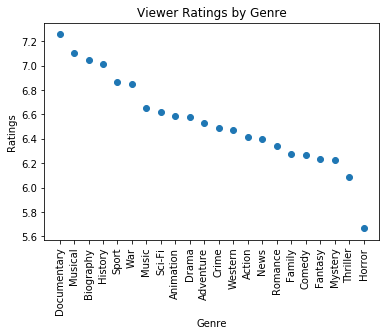

In [125]:
plt.scatter(xr, yr)
plt.xticks(rotation=90)
plt.title('Viewer Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Ratings');

In the next graph you see that Sci-Fi, Animation, Action and Western genres have the highest number of ratings votes. Documentaries, Musicals, Biography and History genres have very low numbers of ratings votes.

In [115]:
xv = gen_votes.sort_values(ascending=False).index

In [116]:
xv

Index(['Sci-Fi', 'Adventure', 'Action', 'Western', 'Fantasy', 'Mystery',
       'Animation', 'Crime', 'Thriller', 'Biography', 'Musical', 'Comedy',
       'History', 'Drama', 'Horror', 'Family', 'Sport', 'Romance', 'Music',
       'War', 'Documentary', 'News'],
      dtype='object', name='genres')

In [117]:
yv = gen_votes.sort_values(ascending=False)

In [118]:
yv.head(10)

genres
Sci-Fi       323996.900000
Adventure    211282.732044
Action       191472.336493
Western      166047.083333
Fantasy      151998.550000
Mystery      126387.496403
Animation    113519.779817
Crime        109023.726891
Thriller     101730.833333
Biography     90772.821656
Name: numvotes, dtype: float64

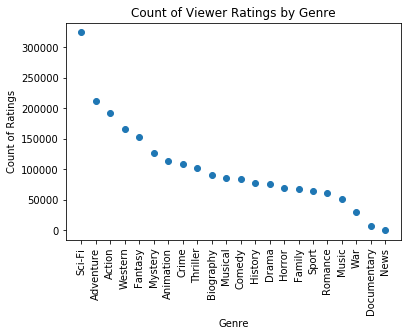

In [126]:
plt.scatter(xv, yv)
plt.xticks(rotation=90)
plt.title('Count of Viewer Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Count of Ratings');

Sci_Fi movies receive far more votes than any other genre, with Adventure, Action, Western and Fantasy also well represented. Is there a correlation between Count of Ratings votes and Box Office Revenue?

In [120]:
x = gen_gross.sort_values(ascending=False).index

In [121]:
x

Index(['Sci-Fi', 'Adventure', 'Animation', 'Action', 'Fantasy', 'Musical',
       'Family', 'Comedy', 'Western', 'Thriller', 'Sport', 'Crime', 'Mystery',
       'Horror', 'History', 'Biography', 'Drama', 'Music', 'Romance', 'News',
       'War', 'Documentary'],
      dtype='object', name='genres')

In [122]:
y = gen_gross.sort_values(ascending=False)

In [123]:
y.head(10)

genres
Sci-Fi       1.524188e+08
Adventure    1.277745e+08
Animation    1.183033e+08
Action       9.802126e+07
Fantasy      8.346416e+07
Musical      6.650000e+07
Family       6.358679e+07
Comedy       5.009595e+07
Western      4.210493e+07
Thriller     4.210093e+07
Name: domestic_gross, dtype: float64

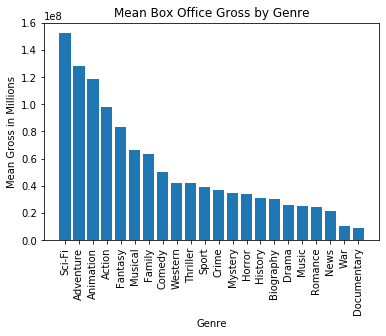

In [124]:
plt.bar(x, y)
plt.xticks(rotation=90)
plt.title('Mean Box Office Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Gross in Millions');
pd.savefig('')

Sci-Fi, Adventure, Animation, Action, and Fantasy genres round up the top five genres for Box Office Gross revenue in the US in the last five years. It's interesting to note that Sci-Fi and Adventure, Action and Fantasy are also in the top five genres with the highest count of Viewer Ratings. So there is some correlation between number of Viewer Ratings and Box Office revenue.

# Conclusions

This analysis answers Microsoft's business question regarding where to focus their movie making efforts. Clearly Sci-Fi, Adventure, Animation, Action, and Fantasy are the genres generating the most box office revenue. It also suggests that the number of viewer ratings posted online correlates to box office revenue. So Microsoft should consider marketing campaigns geared toward generating high number of viewer reviews. And be aware that the actual rating value appears to have little to do with success at the box office.

# Next Steps

Further analyses could yield additional insights as to the relationship between the number of viewer ratings, the rating value itself and box office revenue. 
Following a successful US launch we can provide additional analysis on other markets such as APAC, EMEA, Central and South America etc.